# Подготовительная работа

In [1]:
%matplotlib inline

import sympy as sp
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

# Задача A

Вычислить
$$
\lim\limits_{n \rightarrow \infty} \left| \frac{1}{n} - \frac{2}{n} + \frac{3}{n} + \ldots + \frac{(-1)^{n-1}n}{n}\right|
$$

In [2]:
def f(x):
    res = 0
    for n in np.arange(1, x + 1):
        res += (-1)**(n-1) * n / x
    return abs(res)

In [3]:
sp.mpmath.limit(f, sp.mpmath.inf)

mpf('0.5')

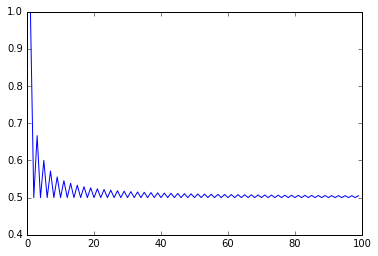

In [4]:
ns = np.arange(1, 100)
plt.plot(ns, list(map(f, ns)));

# Задача B

Вычислить
$$
\lim\limits_{x \rightarrow 3} \frac{\sqrt{x + 6} - \sqrt{10x - 21}}{5x - 15}
$$

In [5]:
def numerator(x):
    return (x + 6)**0.5 - (10 * x - 21)**0.5

def denominator(x):
    return 5 * x - 15

def f(x):
    return numerator(x) / denominator(x)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


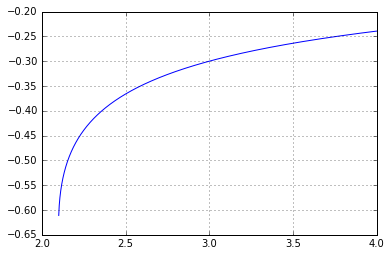

In [6]:
xs = np.arange(2, 4, 0.001)
plt.plot(xs, list(map(f, xs)))
plt.grid(True);

In [7]:
sp.mpmath.limit(f, 3)

mpf('-0.29999999999999999')

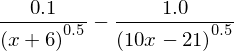

In [8]:
x = sp.var('x')
hello_lopital = sp.diff(numerator(x), x) / sp.diff(denominator(x), x)
hello_lopital

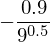

In [9]:
hello_lopital.subs({'x':3})

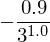

In [10]:
sp.simplify(hello_lopital.subs({'x':3}))

In [11]:
sp.N(hello_lopital.subs({'x':3}))

# Задача C

Вычислите определенный интеграл
$$
\int\limits_{1}^{e^2} \frac{\ln^2x}{\sqrt{x}} dx
$$

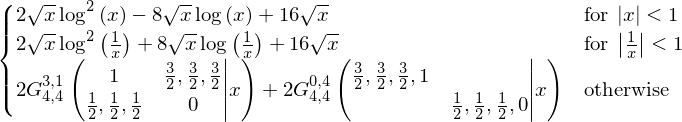

In [12]:
x = sp.var('x')
I = sp.integrate(sp.log(x)**2 / sp.sqrt(x), x)
I

In [13]:
I.subs({'x': sp.E**2}) - I.subs({'x':1.000001}) # Трудное место, 1 не вычслится, но подумаем о непрерывности...

# Задача D

Найдите собственный вектор матрицы, соответствующий ее максимальному собственному значению. В ответ запишите любой из подходящих векторов
$$
\begin{pmatrix}
    2 & -5 & -8\\
    -8 & -6 & -2\\
    4 & 3 & 1
\end{pmatrix}
$$

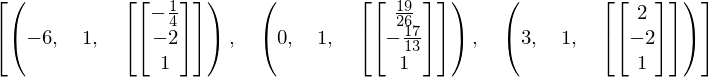

In [14]:
m = sp.Matrix([[2, -5, -8], [-8, -6, -2], [4, 3, 1]])
m.eigenvects()

# Задача E

При каких значениях параметра $a$ данная матрица имеет ранг 2?
$$
\begin{pmatrix}
    a - 6 & 1 & 1\\
    -8 & a & 2\\
    4 - 6a & a & a^2 + a - 4
\end{pmatrix}
$$

In [15]:
a = sp.var('a')
m = sp.Matrix([[a - 6, 1, 1], [-8, a, 2], [4 - 6 * a, a, a**2 + a - 4]])

In [16]:
m.det()

In [17]:
sp.solve(m.det(), a)

In [18]:
m.subs({'a':-2}).rank()

In [19]:
m.subs({'a':2}).rank()

In [20]:
m.subs({'a':3}).rank()

# Еще

Для матрицы $P$
$$
P = \begin{pmatrix}
    \frac{2}{3} & \frac{1}{3}\\
    \frac{1}{9} & \frac{8}{9}
\end{pmatrix}
$$
найти
$
    \lim\limits_{n \rightarrow \infty} P^n
$

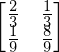

In [21]:
one = sp.sympify(1)
P = sp.Matrix([[2*one/3, one/3], [one/9, 8 * one / 9]])
P

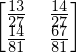

In [22]:
P**2

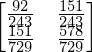

In [23]:
P**3

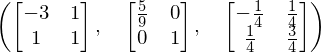

In [24]:
D, L = P.diagonalize()
D, L, D.inv()

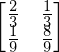

In [25]:
D * L * D.inv()

In [26]:
n = sp.var('n')
Ln = sp.diag((5*one/9)**n, one)

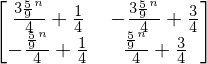

In [27]:
Pn = D * Ln * D.inv()
Pn

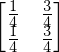

In [28]:
Pn.limit(n, sp.mpmath.inf)